# Load

In [31]:
import keras
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
import scipy

In [32]:
from sklearn.model_selection import train_test_split

df=pd.read_csv("../Lab/titanik/train.csv")
xt,xv,yt,yv = train_test_split(df.drop('Survived',axis=1),df['Survived'])
dft=pd.read_csv("../Lab/titanik/test.csv")

# Vizualization

In [155]:
dfv=df.copy()
dfv=dfv.drop('Ticket',axis=1)
dfv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [5]:
test=pd.crosstab(df['Sex'],df['Survived'])
test
scipy.stats.chi2_contingency(test)

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

In [157]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [152]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [159]:
dft.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


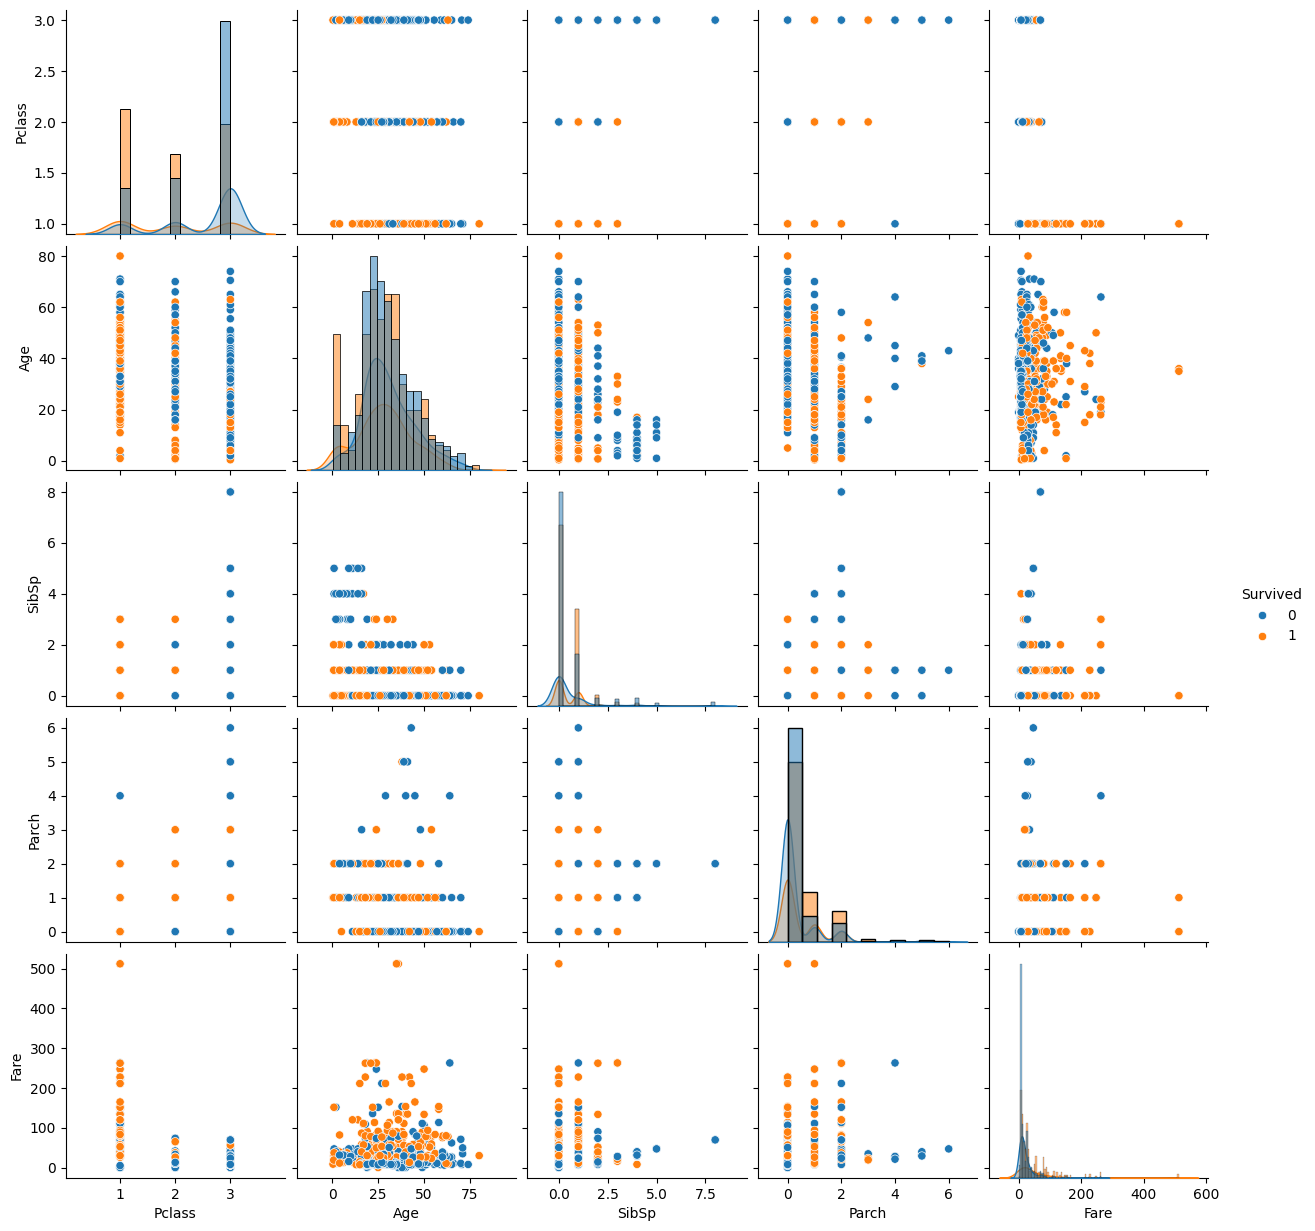

In [28]:
g=sns.pairplot(data=df,hue='Survived')
g.map_diag(sns.histplot,stat='density',common_norm=False)

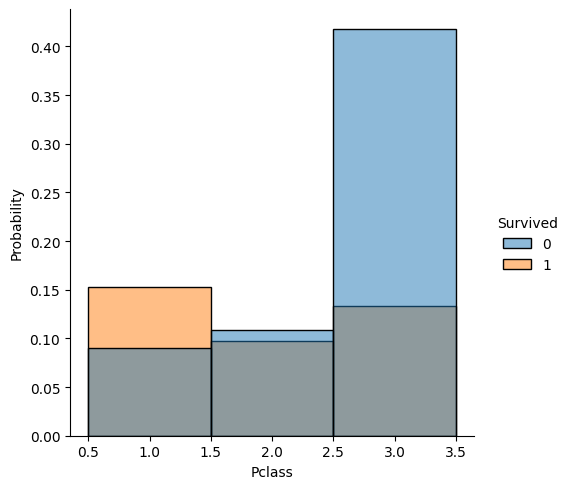

In [29]:
sns.displot(data=df,x='Pclass',hue='Survived',stat='probability', discrete=True)

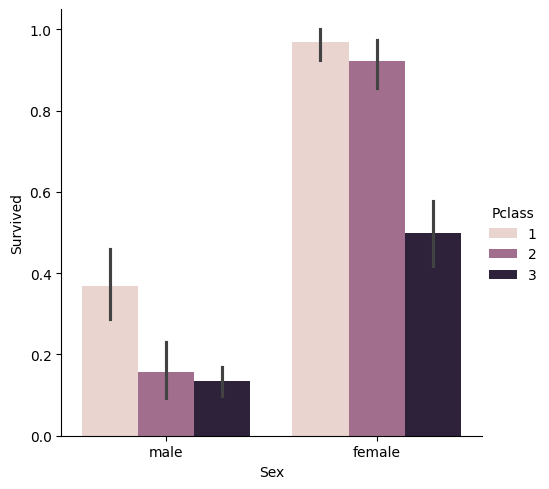

In [35]:
sns.catplot(data=df, x="Sex", y="Survived", hue="Pclass", kind="bar")

In [39]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [40]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [42]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Preprocessing

In [33]:
from sklearn.base import BaseEstimator,TransformerMixin, OneToOneFeatureMixin
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer, KBinsDiscretizer, Normalizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer



class TransformCabin(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        val=pd.DataFrame({'letter':[]})
        X=X.fillna('')
        val['letter']=X.str.findall(r'\D+').apply(lambda x: x[0] if len(x)>=1 else '0')
        onehot=OneHotEncoder(drop='first',sparse_output=False,min_frequency=3)
        onehot=onehot.fit(val[['letter']])
        self.onehot= onehot
        return self
        
    def transform(self,X,y=None):
        val=pd.DataFrame({'letter':[]})
        X=X.fillna('')
        val['letter']=X.str.findall(r'\D+').apply(lambda x: x[0] if len(x)>=1 else '0')
        encod=self.onehot.transform(val[['letter']])
        encod=pd.DataFrame(encod,columns=self.onehot.get_feature_names_out())
        encod.index=X.index
        
        return encod
    def get_feature_names_out(self,name=None):
        return self.onehot.get_feature_names_out()



In [34]:
encode=ColumnTransformer([
    ('sex_encod',OrdinalEncoder().set_output(transform='pandas'),['Sex']),
    ('cabin',TransformCabin(),'Cabin'),
    ('embark_encod',OrdinalEncoder().set_output(transform='pandas'),['Embarked']),
    ('drop_passang_name_tick','drop',['PassengerId','Name','Ticket'])
], remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

imputer=ColumnTransformer([
    ('age_fare',KNNImputer(),make_column_selector(dtype_include=np.number))
], remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

def fu(x,y):
    return ['family']

bining = ColumnTransformer([
    ('bining_age',KBinsDiscretizer(n_bins=8,encode='onehot-dense'),['Age']),
    ('bining_fare',KBinsDiscretizer(n_bins=8,encode='onehot-dense'),['Fare']),
    ('family',FunctionTransformer(lambda x: (x['SibSp']+x['Parch']).to_frame(),feature_names_out=fu),['SibSp','Parch']),
    ('keep',Normalizer(),['Age','Fare'])
     ], remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

comb=make_pipeline(encode,imputer,bining)

out=comb.fit_transform(xt)
out

,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Fare_0.0,Fare_1.0,...,letter_A,letter_B,letter_C,letter_D,letter_E,letter_F,letter_G,letter_infrequent_sklearn,Embarked,Pclass
114,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
788,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
588,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
53,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
401,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
108,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
488,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
702,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [35]:
out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 114 to 449
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age_0.0                    668 non-null    float64
 1   Age_1.0                    668 non-null    float64
 2   Age_2.0                    668 non-null    float64
 3   Age_3.0                    668 non-null    float64
 4   Age_4.0                    668 non-null    float64
 5   Age_5.0                    668 non-null    float64
 6   Age_6.0                    668 non-null    float64
 7   Age_7.0                    668 non-null    float64
 8   Fare_0.0                   668 non-null    float64
 9   Fare_1.0                   668 non-null    float64
 10  Fare_2.0                   668 non-null    float64
 11  Fare_3.0                   668 non-null    float64
 12  Fare_4.0                   668 non-null    float64
 13  Fare_5.0                   668 non-null    float64
 1

# Gradient bosting

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

grad=GradientBoostingClassifier(random_state=42)
pipe=make_pipeline(comb,grad)

# params={'gradientboostingclassifier__learning_rate': uniform(4.7,3)}

# search=RandomizedSearchCV(pipe_grad,cv=5,param_distributions=params).fit(x[:-50],y[:-50])
# search.best_score_
# model=search.best_estimator_


In [116]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score

cat=CatBoostClassifier(random_state=42,custom_loss=[metrics.Accuracy()],logging_level='Silent')
pipe=make_pipeline(comb,cat)

TypeError: CatBoostClassifier.__init__() got an unexpected keyword argument 'plot'

# Validation

In [125]:
model=pipe.fit(xt,yt,catboostclassifier__plot=True,catboostclassifier__eval_set=(xv,yv))

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=2]="Gale, Mr. Shadrach": Cannot convert 'b'Gale, Mr. Shadrach'' to float

In [155]:
model

/home/zew/Projects/main/.venv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer-1',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('sex_encod',
                                                                   OrdinalEncoder(),
                                                                   ['Sex']),
                                                                  ('cabin',
                                                                   TransformCabin(),
                                                                   'Cabin'),
                                                                  ('embark_encod',
                                                                   OrdinalEncoder(),
                                                                   ['Embarked']),
                                                                  ('drop_passang_name_tick',
                                                                   'drop',
                                                                   ['PassengerId',
                                                                    'Name',
                                                                    'Ticket'])],
                                                    verbose_feature_names_out=False)),
                                 ('col...
                                                                   KBinsDiscretizer(encode='onehot-dense',
                                                                                    n_bins=8),
                                                                   ['Fare']),
                                                                  ('family',
                                                                   FunctionTransformer(feature_names_out=<function fu at 0x7f6f2c5bdbc0>,
                                                                                       func=<function <lambda> at 0x7f6f2c5bdb20>),
                                                                   ['SibSp',
                                                                    'Parch']),
                                                                  ('keep',
                                                                   Normalizer(),
                                                                   ['Age',
                                                                    'Fare'])],
                                                    verbose_feature_names_out=False))])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7f6f0a14e450>)])

In [115]:
model.score(xv,yv)

0.7713004484304933

In [45]:
final=pipe.fit(df.drop('Survived',axis=1),df['Survived'])

In [46]:
final.score(xv,yv)

0.8475336322869955

# ANN

In [17]:
from pathlib import Path
from datetime import datetime

model=keras.models.Sequential([
    keras.layers.Input([9]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(1,activation='sigmoid')
])
run_logdir = Path() / 'my_logs' / 'titanic' / f'run {datetime.now()}'

write=keras.callbacks.TensorBoard(run_logdir)
early_stopping=keras.callbacks.EarlyStopping(patience=5)
# checkpoint=keras.callbacks.ModelCheckpoint('/model.keras',save_best_only=True)
callbacks=[write,early_stopping]

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(x.astype(np.float32),y.astype(np.float32),callbacks=callbacks,epochs=100,validation_split=0.15)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4697 - loss: 3.1680 - val_accuracy: 0.7239 - val_loss: 0.6974
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5266 - loss: 2.2609 - val_accuracy: 0.6716 - val_loss: 0.6884
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5536 - loss: 1.8584 - val_accuracy: 0.7239 - val_loss: 0.6721
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6078 - loss: 1.3624 - val_accuracy: 0.6716 - val_loss: 0.5741
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5878 - loss: 1.1941 - val_accuracy: 0.6791 - val_loss: 0.5849
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5380 - loss: 1.2850 - val_accuracy: 0.7239 - val_loss: 0.5904
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5723 - loss: 1.0458 - val_accuracy: 0.7313 - val_loss: 0.5581
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6145 - loss: 0.9754 - val_accuracy: 0.7164 - v

In [19]:
model.predict(x.astype(np.float32))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.46109816],
       [0.61810654],
       [0.4564788 ],
       [0.5611114 ],
       [0.42960253],
       [0.44044042],
       [0.5149664 ],
       [0.34977165],
       [0.47173652],
       [0.5218735 ],
       [0.48551357],
       [0.46658686],
       [0.46045235],
       [0.43287563],
       [0.4699846 ],
       [0.41619822],
       [0.2972017 ],
       [0.46036348],
       [0.48941818],
       [0.44723645],
       [0.4826308 ],
       [0.4484009 ],
       [0.4623958 ],
       [0.50712323],
       [0.4573734 ],
       [0.45198095],
       [0.43681246],
       [0.95993084],
       [0.447629  ],
       [0.43808398],
       [0.48555908],
       [0.7490585 ],
       [0.44800848],
       [0.40272757],
       [0.60710365],
       [0.5135421 ],
       [0.43681094],
       [0.4592325 ],
       [0.4745551 ],
       [0.47833133],
       [0.4395708 ],
       [0.49083623],
       [0.4370125 ],
       [0.51437676],
       [0.45679936],
       [0.4382475 ],
       [0.46582982],
       [0.448

# Test

In [47]:
ansver=pd.DataFrame(final.predict(dft),index=dft['PassengerId'],columns=['Survived'])

ansver

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [53]:
ansver.to_csv('../Lab/titanik/ansver_last.csv')